In [48]:
import numpy as np
import os
import matplotlib
from matplotlib.pyplot import *
from scipy.integrate import odeint
from scipy.stats import norm
from math import * 
import sys
from numpy.fft import *
import warnings
from scipy.optimize import fsolve
warnings.filterwarnings('ignore')

%pylab inline
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'white'),(0.1, 'blue'),
                                                    (0.3,'green'),(0.4, 'yellow'),
                                                    (0.6,'brown'),(1.0,'white')],N=256)

cmapnew = LinearSegmentedColormap.from_list('mycmap', [(0, 'white'),(0.25, 'blue'),
                                                    (0.5,'green'),(0.75, 'yellow'),
                                                    (1.0,'brown')],N=256)

Populating the interactive namespace from numpy and matplotlib


Extracted T2 :  343.43098605724606
Extracted p :  1.0075923117486516


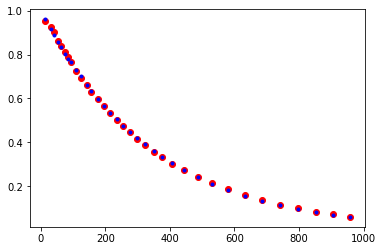

In [49]:
from scipy.optimize import curve_fit
def myfunction(t, T2, p):
    power = (t*1.0/T2)**p
    return exp(-power);

myFile = np.genfromtxt('a.csv', delimiter=',');
t_data = myFile[:,0]*1e-6;
C_data = myFile[:,1]

T2_guess = 300e-6; p_guess = 1;
params, _ = curve_fit(myfunction, t_data, C_data, p0=(T2_guess, p_guess))
T2_fit = params[0]; p_fit = params[1]

print('Extracted T2 : ', T2_fit/1e-6);
print('Extracted p : ', p_fit);

plot(t_data/1e-6, C_data, 'ro');
plot(t_data/1e-6, myfunction(t_data, T2_fit, p_fit), 'b.');


Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'C(t)')

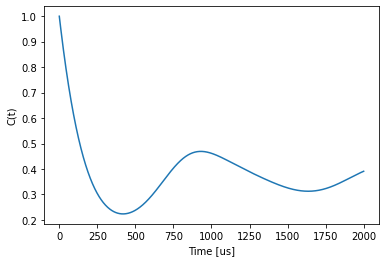

In [50]:
%pylab inline
from numpy import exp, pi, cos, abs
from math import inf, pow
import scipy.integrate as integrate
import matplotlib.pyplot as pyplot

def calc_FF(tau):
    tpi = 100e-9;  t1 = (tau + tpi)/2; 
    w = linspace(0.01e6, 20e6, 50000); # rad/s
    return w, ( abs( 1 + exp(1j*w*tau) - 2*exp(1j*w*t1)*cos(w*tpi/2) ) )**2/w**2; 

trange = linspace(.1e-6, 2000e-6, 2000)
chi = zeros(len(trange));
T2 = 300e-6;

i=0;
for tau in trange:
    w, FF = calc_FF(tau);
    chi[i] = integrate.trapz(FF/T2/2., w); i = i +1; 

plot(trange/1e-6, exp(-chi));
xlabel('Time [us]'); ylabel('C(t)')

In [51]:
def calc_FF(tau):
    tpi = 100e-9;  t1 = (tau + tpi)/2; 
    w = linspace(0.01e6, 20e6, 50000); # rad/s
    return w, ( abs( 1 + exp(1j*w*tau) - 2*exp(1j*w*t1)*cos(w*tpi/2) ) )**2/w**2; 


In [52]:
tau = 1e-6
w, FF = calc_FF(tau);

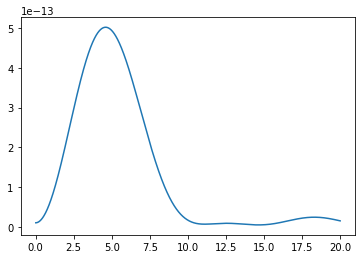

In [53]:
plot(w/1e6, FF)

In [54]:
theta = 1*pi/180 # radian
f_FM = 0.5; f_AFM = 1 - f_FM;
J_perp = 0.1; K = 0.3; J_para = 2; J_perpFM = 0.2



theta = linspace(0, 10)*pi/180;
E_AF = 2*f_AFM*J_perp/(2*sin(theta/2))**2;
E_DW = pi*sqrt(J_para*(K + 2*J_perp)) / (2*sin(theta/2));
E_FM = 2*f_FM*J_perpFM/(2*sin(theta/2))**2;

E_NC = - (E_AF + E_FM) + E_DW;
E_CFM = - E_FM +E_AF;


(-100.0, 10.0)

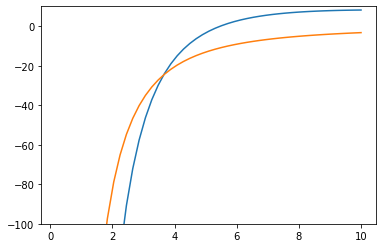

In [55]:
plot(theta*180/pi, E_NC);
plot(theta*180/pi, E_CFM);
ylim([-100, 10])

line break

In [56]:
from numpy import linspace
from numpy import sin, cos
def spinbath_filter_function(w,tao=1E-6,n=1):
    print(pi/tao/1E6)
    t = n * tao;
    return 8 * sin(w*t/2)**2 * sin(w*t/4/n)**4 / cos(w*t/2/n)**2;


3.1415926535897936


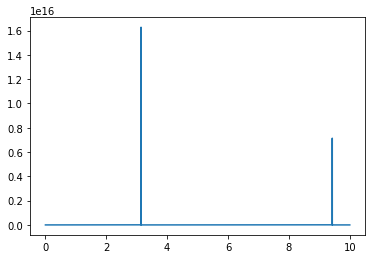

In [57]:
w = linspace(0,10E6,100000000);

spinbath_filter_function_values = spinbath_filter_function(w);

plot(w/1E6,spinbath_filter_function_values)

In [58]:
from scipy import integrate

integ_filterfunction = integrate.trapz(spinbath_filter_function_values, w);

print(integ_filterfunction);


2965177701209734.0
